1. Import and Install Dependencies

In [1]:
!python.exe -m pip install --upgrade pip

In [2]:
%pip install --upgrade mediapipe

  Using cached mediapipe-0.10.14-cp312-cp312-win_amd64.whl.metadata (9.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached sounddevice-0.5.0-py3-none-win_amd64.whl.metadata (1.4 kB)
Using cached mediapipe-0.10.14-cp312-cp312-win_amd64.whl (50.8 MB)
Using cached sounddevice-0.5.0-py3-none-win_amd64.whl (189 kB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.2 MB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.0 MB 1.1 MB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.0 MB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.0 MB 1.1 MB/s eta 0:00:01
   

In [3]:
%pip install --upgrade protobuf==4.25.3

  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.4
    Uninstalling protobuf-4.25.4:
      Successfully uninstalled protobuf-4.25.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.14 requires protobuf<5,>=4.25.3, but you have protobuf 5.28.1 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.1 which is incompatible.


In [4]:
%pip install tensorflow opencv-python scikit-learn matplotlib

  Using cached protobuf-4.25.4-cp310-abi3-win_amd64.whl.metadata (541 bytes)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/385.2 MB 322.8 kB/s eta 0:19:52
   ---------------------------------------- 0.5/385.2 MB 322.8 kB/s eta 0:19:52
   ---------------------------------------- 0.8/385.2 MB 409.3 kB/s eta 0:15:40
   ---------------------------------------- 

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf.symbol_database")

2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic #to detect
mp_drawing = mp.solutions.drawing_utils # to draw
mp_face_mesh = mp.solutions.face_mesh  # for face mesh connections

In [7]:
def mediapipe_detection(image, model):  # pass image and model
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # bgr 2 rgb
    image.flags.writeable = False 
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [8]:
def draw_landmarks(image, results):  # draw landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)  # face landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # pose landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # left hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # right hand landmarks


In [9]:
def draw_styled_landmarks(image, results):  # draw styled landmarks
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [10]:
# def draw_landmarks(image, results): #draw landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) #face landmarks
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #pose landmarks
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #left hand landmarks
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #right hand landmarks

In [33]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [34]:
results

mediapipe.python.solution_base.SolutionOutputs

In [35]:
draw_styled_landmarks(image, results)

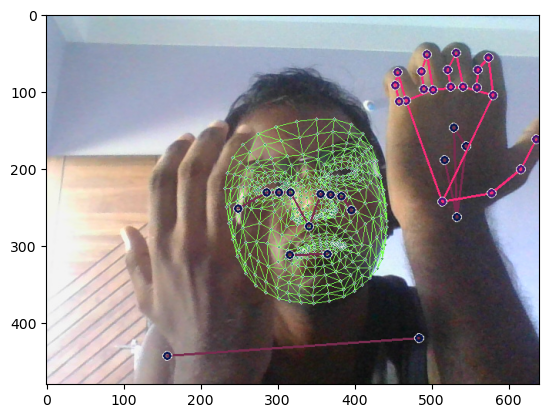

In [36]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values

In [37]:
results.pose_landmarks.landmark[0].visibility

0.9996616244316101

In [50]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [51]:
print(len(results.pose_landmarks.landmark))
# print(len(results.left_hand_landmarks.landmark))
# print(len(results.right_hand_landmarks.landmark))
print(len(results.face_landmarks.landmark))

33
468


In [53]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [56]:
pose.shape

(132,)

In [58]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, lh, rh])

In [63]:
result_test=extract_keypoints(results)

In [64]:
result_test

array([ 0.53388929,  0.57439327, -1.31874657, ...,  0.        ,
        0.        ,  0.        ])

In [65]:
np.save('0', result_test)

In [66]:
np.load('0.npy')

array([ 0.53388929,  0.57439327, -1.31874657, ...,  0.        ,
        0.        ,  0.        ])

In [60]:
extract_keypoints(results).shape
#468*3+33*4+21*3+21*3 

(1662,)

4. Setup Folders for Collection

In [61]:
#export numpy array data
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#Videos are going to be of 30 frames in length
sequence_length = 30

In [ ]:
#hello
#thanks
#i love you

In [62]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

5. Collect Keypoint Values for Training and Testing

In [67]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # while cap.isOpened():
    #Loop through actions   
    #NEW
    for action in actions:
        #Loop through sequences aka 
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
            
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                draw_styled_landmarks(image, results)
                # Wait until atleast 2 seconds pass
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2500)
                else:
                    cv2.putText(image, 'Collecting frames for {action} Video Number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path,keypoints)
                
                
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

6. Preprocess Data and Create Labels and Features

In [70]:
from sklearn.model_selection  import train_test_split
from tensorflow.keras.utils import to_categorical

In [71]:
label_map={label:num for num, label in enumerate(actions)}

In [72]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [73]:
sequences, labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [74]:
np.array(sequences).shape

(90, 30, 1662)

In [75]:
np.array(labels).shape

(90,)

In [76]:
X = np.array(sequences)

In [77]:
X.shape

(90, 30, 1662)

In [78]:
y = to_categorical(labels).astype(int)

In [79]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [85]:
X_train.shape

(85, 30, 1662)

In [86]:
X_test.shape

(5, 30, 1662)

In [87]:
y_train.shape

(85, 3)

In [88]:
y_test.shape

(5, 3)

7. Build and Traom LSTM Neural Network

In [133]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [135]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [136]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [137]:
actions.shape[0]

3

In [138]:
res = [.7, .2, .1]

In [139]:
actions[np.argmax(res)]

'hello'

1) Less Data reproduce a hyper accurate model
2)  Much Denser Neural Network
3) Faster to train
4) NN is lot simpler and meant that it was going to be a whole heap faster when it comes to detecting in real time

In [140]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [148]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.8024 - loss: 0.5070
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - categorical_accuracy: 0.8747 - loss: 0.4688
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.7613 - loss: 0.4623
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.8043 - loss: 0.4531
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.7456 - loss: 0.4742
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.7926 - loss: 0.4884
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.8728 - loss: 0.4872
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.7750 - loss: 0.4819
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.8102 - loss: 0.4415
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.7378 - loss: 0.4808
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

In [150]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

8. Make Predictions

In [153]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [162]:
actions[np.argmax(res[4])]

'hello'

In [163]:
actions[np.argmax(y_test[4])]

'hello'

9.  Save Weights

In [1]:
model.save('action.h5')

NameError: name 'model' is not defined

In [2]:
del model

NameError: name 'model' is not defined

In [ ]:
model.load_weights('action.h5')

10. Evaluating using Confusion Matrix and Accuracy

In [3]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [4]:
yhat = model.predict(X_test)

NameError: name 'model' is not defined

In [5]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'np' is not defined

In [6]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [7]:
accuracy_score(ytrue, yhat)

NameError: name 'ytrue' is not defined

11. Test in Real Time

In [ ]:
# colors = ['red', 'blue', 'green']
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [8]:

sequence.reverse()

NameError: name 'sequence' is not defined

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))